# jm_pandas test

In [1]:
## Standard Libs
from typing import Union, Optional, Tuple, Dict, Any
import warnings
import random

# Third-Party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.text import Text
from rich.panel import Panel

# Local Libs
from jm_datascience import jm_pandas as jm_pd
from jm_datascience import jm_pdaccessor as jm
from jm_utils import jm_richprt as jm_prt


## Some Series and DFs

In [2]:
df_work = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'apellido': ['A_Ana', 'B_Bob', None, 'C_Carlos', None, 'D_Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

## Read spreedsheet for tests
try:
    spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
    with open(spreedsheet) as f:
        pass
except FileNotFoundError:
    spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df_xls = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')
df = df_xls.copy()

lst_str = random.choices([chr(i) for i in range(65, 72)], k=175)
sr_str = jm_pd.to_series(lst_str)                         # <- jm_pd.to_serie_with_count()

## jm_pd.to_series()
- Plus value_counts()

In [3]:
sr_counted = jm_pd.to_series(lst_str).value_counts(sort=False)
sr_counted

A    23
G    30
E    26
D    25
F    21
B    25
C    25
Name: count, dtype: int64

In [4]:
set_str = set(sr_str)
set_str
jm_pd.to_series(set_str)

0    B
1    F
2    A
3    D
4    G
5    C
6    E
dtype: object

In [5]:
sr_state = jm_pd.to_series(df_xls['State'])
print(sr_state.isna().sum())

86


## Paretto Chart

In [6]:
sr = jm_pd.to_series(df['State'])
sr

ID
1030    California
1029    California
2002    California
2031    California
1049    California
           ...    
5044           NaN
5047           NaN
5048           NaN
5050           NaN
5051           NaN
Name: State, Length: 267, dtype: object

## Try pandas to_series()
Index.to_series(index=None, name=None)[source]

In [7]:
print(lst_str)
print(set_str := set(lst_str))
jm_pd.to_series(list(set_str))

['A', 'G', 'A', 'A', 'E', 'D', 'A', 'G', 'G', 'F', 'G', 'D', 'B', 'C', 'C', 'C', 'E', 'E', 'E', 'G', 'E', 'F', 'C', 'C', 'G', 'F', 'G', 'F', 'B', 'E', 'G', 'D', 'G', 'G', 'F', 'E', 'A', 'A', 'D', 'B', 'D', 'D', 'E', 'E', 'G', 'G', 'F', 'F', 'C', 'C', 'B', 'G', 'D', 'F', 'B', 'B', 'D', 'G', 'E', 'C', 'A', 'F', 'D', 'E', 'D', 'F', 'B', 'D', 'G', 'B', 'B', 'C', 'G', 'G', 'B', 'A', 'C', 'F', 'F', 'D', 'A', 'C', 'A', 'D', 'E', 'C', 'F', 'A', 'A', 'B', 'C', 'E', 'A', 'E', 'B', 'C', 'B', 'D', 'A', 'D', 'G', 'G', 'F', 'E', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'C', 'E', 'E', 'E', 'C', 'C', 'G', 'G', 'F', 'B', 'C', 'C', 'D', 'E', 'G', 'F', 'A', 'C', 'D', 'E', 'E', 'D', 'F', 'G', 'B', 'B', 'B', 'B', 'E', 'B', 'G', 'D', 'B', 'F', 'F', 'D', 'G', 'B', 'C', 'A', 'E', 'C', 'E', 'G', 'C', 'C', 'A', 'F', 'A', 'D', 'E', 'B', 'G', 'G', 'D', 'D', 'E', 'F', 'D', 'G', 'A', 'D', 'G', 'B']
{'B', 'F', 'A', 'D', 'G', 'C', 'E'}


0    B
1    F
2    A
3    D
4    G
5    C
6    E
dtype: object

## Generacipon de fdt previo
- jm_pd.get_fdt()

In [8]:
# jm_pd.get_fdt(lst_str, must_count=True).map(jm_prt.fmt_nums)
df['State'].value_counts(dropna=False)

State
California    119
NaN            86
Nevada         17
Colorado       11
Oregon         11
Arizona        11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

In [9]:
# jm_pd.get_fdt(lst_str, must_count=True, fmt_values=True, plain_relatives=False, sort='asc')
# jm_pd.get_fdt(df['State'], must_count=True, fmt_values=True, plain_relatives=False, sort='ix_asc')
jm_pd.get_fdt(df['State'], value_counts=True, fmt_values=True)

,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Freq.,Relative Freq. [%],Cumulative Freq. [%]
State,,,,,,
California,119,119,0.66,0.66,65.75,65.75
Nevada,17,136,0.09,0.75,9.39,75.14
Arizona,11,147,0.06,0.81,6.08,81.22
Oregon,11,158,0.06,0.87,6.08,87.29
Colorado,11,169,0.06,0.93,6.08,93.37
Utah,6,175,0.03,0.97,3.31,96.69
Virginia,4,179,0.02,0.99,2.21,98.90
Kansas,1,180,0.01,0.99,0.55,99.45
Wyoming,1,181,0.01,1.00,0.55,100.00


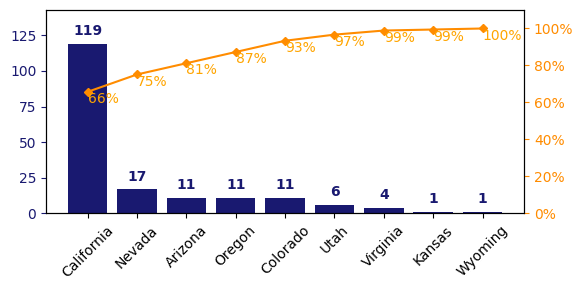

In [10]:
fig = jm_pd.plt_pareto(df['State'], value_counts=True, scale=1)


In [11]:
# jm_pd.get_fdt(lst_str, must_count=True, fmt_values=True, plain_relatives=False, sort='asc')
jm_pd.get_fdt(sr_counted, fmt_values=True, plain_relatives=False, sort='ix_asc')

,Frequency,Relative Freq. [%],Cumulative Freq. [%]
A,23,13.14,13.14
B,25,14.29,85.71
C,25,14.29,100
D,25,14.29,59.43
E,26,14.86,45.14
F,21,12,71.43
G,30,17.14,30.29


In [12]:
## sort_values()
# display(df_work)
# display(df_work.sort_values(by='salario'))
# df_work.sort_values(by='edad', ascending=False)

## Pie - Donut chart

## TO-DO
- Tengo que hacer uno donde toda la data sea externa identificable por color

In [13]:
sr_1 = pd.Series([35, 25, 20, 12, 8], index=['Product A', 'Product B', 'Product C', 'Product D', 'Product E'])
sr_2 = pd.Series({'Region A': 45,'Region B': 30,'Region C': 25})

df_1 = pd.DataFrame([25, 30, 20, 15, 10], index=['A', 'B', 'C', 'D', 'E'], columns=['values'])     
# sr_3 = pd.DataFrame([[25], [30], [20], [15], [10]], index=['A', 'B', 'C', 'D', 'E'], columns=['values'])     # [ERR] values are np.ndarrays, ex. [25] 1x1 array?
sr_4 = pd.Series({'Region A': 45,'Region B': 30,'Region C': 25, 'Region D': 17})
sr_5 = pd.Series([25, 30, 20, 15, 10], index=['A', 'B', 'C', 'D', 'E'], name='Frequency')
# cat_6 = pd.DataFrame(pd.Series)
df_1

,values
A,25
B,30
C,20
D,15
E,10


In [14]:
# data = df_1

# for value in data.values:
#     print(f"{value = } | {type(value) = }")
#     if not isinstance(value, (int, float, np.integer, np.floating)):
#         print(f"{value = } | {type(value) = }")

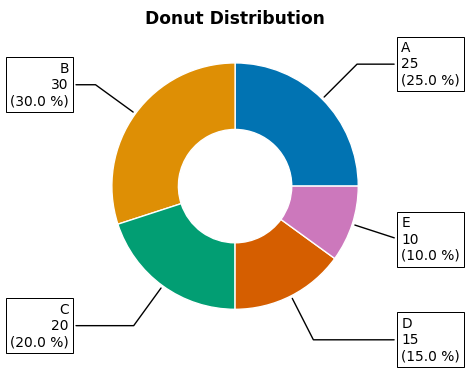

In [15]:
fig, ax = jm_pd.plt_pie(df_1, kind='donut', title='Donut Distribution', startangle=0)

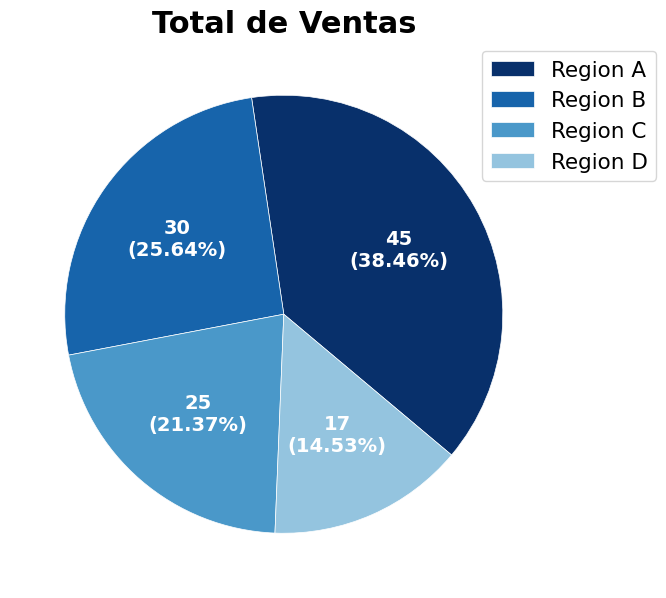

In [16]:
# # fig, ax = jm_pandas.plt_piechart(catdf_1, title='Total de Ventas', rotate=-40)
# # fig, ax = jm_pandas.plt_pie_2(catdf_1, title='Total de Ventas')
fig, ax = jm_pd.plt_pie(sr_4, title='Total de Ventas', kind='pie', label_place='int', scale=4, palette='Blues_r')

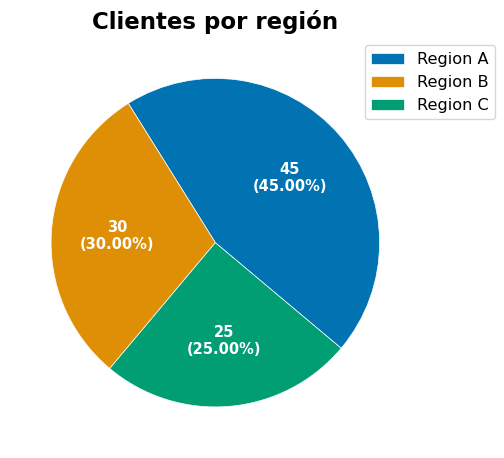

In [17]:
fig, ax = jm_pd.plt_pie(sr_2, title='Clientes por región', scale=3, label_place='int')
# fig, ax = jm_pandas.plt_pie_1(catdf_2, title='Clientes por región')
# fig, ax = jm_pandas.plt_piechart2(catdf_2, title='Clientes por región')

## Numeric Cols
- Basicamente todas las cols a las que les pueda calcular min() y max(), etc. Tambien porque son oject pero tiene números.
- pie-chart is for categorical data in an fdt (frequency distribution table)
- for numeric cols we can do the frequency count of values or histogram by values o by intervals.
- in a series or df[col] jm made the jm_pd.to_series_with_count() for a kind o similar fdt
- BUT we imagen the plt_histogram for more detailed numeric cols histogram (fdt - value_count)

In [18]:
# Let see some numeric columns
df_mini = df[['Age at time of purchase', 'Year of sale']]
df_mini.jm.infomax()

,Column,Dtype,N-Nulls,N-Total,N-Uniques,Pct-Nulls,Memory-Usage,Min-Value,Max-Value,Most-Frequent,Freq-Count,Has-Duplicates,Sample-Values
0,Age at time of purchase,object,88,179,47,33.0,11410,NaN,NaN,48.0,11,True,"[19, 22, 25, 26]"
1,Year of sale,float64,72,195,6,27.0,4272,2004.0,2010.0,2007.0,102,True,"[2005.0, 2007.0, 2004.0, 2008.0]"


In [19]:
# Let convert to best numeric
df_mini1 = df_mini.jm.convert_dtypesmax()
df_mini1.jm.infomax()

,Column,Dtype,N-Nulls,N-Total,N-Uniques,Pct-Nulls,Memory-Usage,Min-Value,Max-Value,Most-Frequent,Freq-Count,Has-Duplicates,Sample-Values
0,Age at time of purchase,Int64,89,178,46,33.3,4539,19,76,48,11,True,"[19, 22, 25, 26]"
1,Year of sale,Int64,72,195,6,27.0,4539,2004,2010,2007,102,True,"[2005, 2007, 2004, 2008]"


In [20]:
# sr_age = jm_pd.to_serie_with_count(df_mini1['Age at time of purchase'], count=True)
# sr_age
# ## imposible for a pie chart

In [21]:
sr_year = jm_pd.to_serie_with_count(df_mini1['Year of sale'], count=True)
display(sr_year)
fig, ax = jm_pd.plt_pie(sr_year, scale=4, startangle=0, kind='donut')
## We had to make another pie for numerous categories: All data outside, in the legend sector.

AttributeError: module 'jm_datascience.jm_pandas' has no attribute 'to_serie_with_count'